In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [3]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Policy Data From KFF

In [42]:
## date range
start = datetime.datetime.strptime("2020-06-04", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-11-14", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

In [69]:
np.random.seed(109)
df_dict = {}
filename = "_Social_Distancing.csv"

for d in date_generated:
    date = str(d.strftime("%Y-%m-%d"))
    try:
        df_dict[date] = pd.read_csv('policy-data/'+str(date)+filename,skiprows=[1,2])
        df_dict[date].rename(columns={ df_dict[date].columns[0]: "Location" }, inplace = True)
    except:
        pass

In [70]:
curr_df = df_dict['2020-11-13']

In [71]:
curr_df

,Location,Status of Reopening,Stay at Home Order,Mandatory Quarantine for Travelers,Non-Essential Business Closures,Large Gatherings Ban,Restaurant Limits,Bar Closures,Face Covering Requirement,Emergency Declaration
0,Alabama,Paused,Lifted,-,All Non-Essential Businesses Permitted to Reop...,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Yes
1,Alaska,Proceeding with Reopening,Lifted,All Travelers,All Non-Essential Businesses Permitted to Reopen,Lifted,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes
2,Arizona,New Restrictions Imposed,Lifted,Lifted,New Business Closures or Limits,New Limit on Large Gatherings in Place,New Service Limits,Newly Closed,Required for Certain Employees;\nAllows Local ...,Yes
3,Arkansas,Paused,-,Lifted,-,Lifted,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes
4,California,Proceeding with Reopening,Statewide,-,New Business Closures or Limits,All Gatherings Prohibited,Reopened to Dine-in Service with Capacity Limits,Newly Closed,Required for General Public,Yes
5,Colorado,New Restrictions Imposed,Lifted,-,Some Non-Essential Businesses Permitted to Reo...,Expanded Limit to 25 or Fewer,Reopened to Dine-in Service with Capacity Limits,Newly Closed,Required for General Public,Yes
6,Connecticut,Proceeding with Reopening,Lifted,From Certain States (New),All Non-Essential Businesses Permitted to Reop...,Expanded Limit to 25 or Fewer,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,Yes
7,Delaware,Proceeding with Reopening,Lifted,Lifted,Some Non-Essential Businesses Permitted to Reo...,Expanded Limit to Greater Than 25,Reopened to Dine-in Service with Capacity Limits,Reopened,Required for General Public,Yes
8,District of Columbia,Proceeding with Reopening,Lifted,From Certain States (New),Some Non-Essential Businesses Permitted to Reo...,Expanded Limit to Greater Than 25,Reopened to Dine-in Service with Capacity Limits,Closed,Required for General Public,Yes
9,Florida,Proceeding with Reopening,Lifted,Lifted,All Non-Essential Businesses Permitted to Reopen,Lifted,Reopened to Dine-in Service,Reopened,Required for Certain Employees,Yes


In [81]:
quarantine_df_test = curr_df[["Location","Mandatory Quarantine for Travelers"]]
quarantine_df_test

,Location,Mandatory Quarantine for Travelers
0,Alabama,-
1,Alaska,All Travelers
2,Arizona,Lifted
3,Arkansas,Lifted
4,California,-
5,Colorado,-
6,Connecticut,From Certain States (New)
7,Delaware,Lifted
8,District of Columbia,From Certain States (New)
9,Florida,Lifted


In [82]:
quarantine = {}
quarantine_df = quarantine_df_test[["Location"]]
for d in date_generated:
    date = str(d.strftime("%Y-%m-%d"))
    try:
        quarantine[date] = df_dict[date][["Location","Mandatory Quarantine for Travelers"]]
        quarantine_df[date] = df_dict[date]["Mandatory Quarantine for Travelers"]
    except:
        pass

In [83]:
quarantine['2020-11-13']["Mandatory Quarantine for Travelers"].value_counts()

-                                      22
Lifted                                 16
From Certain States (New)               4
All Travelers                           4
Rolled Back to Certain States           2
All Travelers (New)                     1
From Certain States                     1
Rolled Back to International Travel     1
Name: Mandatory Quarantine for Travelers, dtype: int64

([<matplotlib.axis.XTick at 0x7ff816611af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

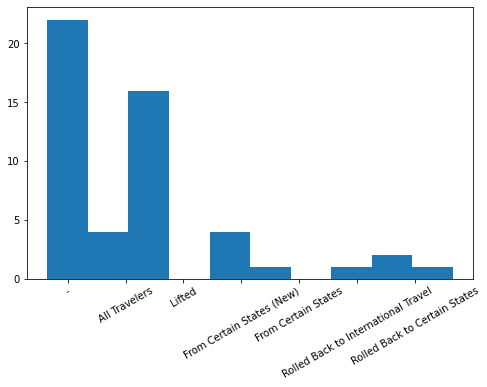

In [80]:
plt.figure(figsize = (8,5))
plt.hist(quarantine['2020-11-13']["Mandatory Quarantine for Travelers"], align='left')
plt.xticks(rotation=30)
plt.xticks(range(7))

In [84]:
quarantine_df

,Location,2020-06-04,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-17,2020-06-22,2020-06-24,2020-06-25,...,2020-09-24,2020-10-01,2020-10-05,2020-10-22,2020-10-23,2020-10-27,2020-11-02,2020-11-06,2020-11-11,2020-11-13
0,Alabama,All Travelers,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Alaska,Lifted,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,...,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers,All Travelers
2,Arizona,From Certain States,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,...,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted
3,Arkansas,-,From Certain States,From Certain States,From Certain States,Lifted,Lifted,Lifted,Lifted,Lifted,...,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted
4,California,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Colorado,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
6,Connecticut,Lifted,-,-,-,-,-,-,From Certain States (New),From Certain States (New),...,From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New)
7,Delaware,-,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,...,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted
8,District of Columbia,From Certain States,-,-,-,-,-,-,-,-,...,From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New),From Certain States (New)
9,Florida,-,From Certain States,From Certain States,From Certain States,From Certain States,From Certain States,From Certain States,From Certain States,From Certain States,...,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted,Lifted


# Quarantine Data
Adapted from https://github.com/covidvis/covid19-vis

In [75]:
quan_df = pd.read_csv("policy-data/quarantine-activity-US-Apr16-long.csv")

In [76]:
quan_df

,State,Coverage.type,Coverage.location,Effective Date,State of Emergency Declaration,Travel Restrictions,Shelter-in-place Order,Gathering Limitations,Banning Gatherings of a Certain Size,K-12 School Closure,Bar and Dine-in Restaurant Closure,Non-essential Businesses Closure,Details (if any),Reference links,Timestamp,population_size,population_reference,Coverage.county.FIPS,Coverage.city.FIPS,population_reference.1
0,Alabama,State-wide,Alabama,3/13/20,State of Emergency declared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/U.S._state_and_l...,4/10/20,4903185,1.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
1,Alabama,State-wide,Alabama,3/27/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some (cherry-picked) businesses closed,"On March 27, all non-essential businesses"" in ...",https://en.wikipedia.org/wiki/2020_coronavirus...,4/10/20,4903185,1.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
2,Alabama,State-wide,Alabama,3/2/20,NaN,NaN,NaN,Suggested social distancing,NaN,NaN,NaN,NaN,"On March 2, the Alabama Department of Public H...",https://en.wikipedia.org/wiki/2020_coronavirus...,4/10/20,4903185,1.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
3,Alabama,State-wide,Alabama,4/4/20,NaN,NaN,Shelter-in-place order,NaN,NaN,NaN,NaN,NaN,"On April 3, Governor Ivey issued a statewide s...",https://en.wikipedia.org/wiki/2020_coronavirus...,4/10/20,4903185,1.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
4,Alabama,State-wide,Alabama,3/18/20,NaN,NaN,NaN,Banned gatherings of a certain size,50.0,Schools closed,NaN,NaN,"On March 12, all schools were closed from Marc...",https://en.wikipedia.org/wiki/2020_coronavirus...,4/10/20,4903185,1.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Wyoming,State-wide,Wyoming,3/15/20,NaN,NaN,NaN,NaN,NaN,Schools closed,NaN,NaN,"On March 15, Governor Gordon and Wyoming State...",https://en.wikipedia.org/wiki/U.S._state_and_l...,4/13/20,578759,56.0,NaN,NaN,https://www.census.gov/data/datasets/time-seri...
603,Wyoming,Regional,Teton,3/28/20,NaN,NaN,Shelter-in-place order,NaN,NaN,NaN,NaN,NaN,The Town of Jackson on Saturday ordered reside...,https://trib.com/news/local/casper/jackson-iss...,4/13/20,23464,56.0,39,NaN,https://www.census.gov/data/datasets/time-seri...
604,Wyoming,Regional,Teton,3/30/20,NaN,NaN,NaN,Suggested limiting of gatherings,NaN,NaN,NaN,NaN,New health order limits gatherings to househol...,https://buckrail.com/new-health-order-limits-g...,4/13/20,23464,56.0,39,NaN,https://www.census.gov/data/datasets/time-seri...
605,Wyoming,Regional,Jackson,3/28/20,NaN,NaN,Shelter-in-place order,NaN,NaN,NaN,NaN,NaN,The Town of Jackson on Saturday ordered reside...,https://trib.com/news/local/casper/jackson-iss...,4/13/20,10429,56.0,NaN,40120.0,"https://en.wikipedia.org/wiki/Jackson,_Wyoming"
